In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
csv_path = "/home/ryan.zurrin001/Projects/omama/_EXPERIMENTS/CS438/labels/features_balanced_scaled.csv"

In [4]:
features = pd.read_csv(csv_path)

In [5]:
features.columns

Index(['label', 'ImageLaterality', 'PatientAge', 'Manufacturer',
       'ManufacturerModelName', 'DistanceSourceToDetector',
       'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
       'Exposure', 'ExposureInuAs', 'KVP', 'BodyPartThickness',
       'CompressionForce', 'PositionerPrimaryAngle', 'ViewPosition',
       'DetectorTemperature', 'DetectorType', 'Rows', 'Columns', 'score',
       'target_label', 'coords1', 'coords2', 'coords3', 'coords4',
       'resized_coords1', 'resized_coords2', 'resized_coords3',
       'resized_coords4', 'FieldOfViewOrigin1', 'FieldOfViewOrigin2',
       'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',
       'WindowWidth1', 'WindowWidth2', 'WindowWidth3', 'WindowWidth4',
       'histogram_mean', 'histogram_median', 'histogram_std', 'histogram_min',
       'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
       'histogram_percentile_75', 'flattened_image_mean',
       'flattened_image_median', 'fla

In [6]:
features = features.drop(columns=['label', 'score', 'coords1', 'coords2', 'coords3', 'coords4',
       'resized_coords1', 'resized_coords2', 'resized_coords3',
       'resized_coords4'])

In [7]:
# Separate the features and target label
X = features.drop('target_label', axis=1)
y = features['target_label']

In [8]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [28]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train, y_train)

# Validate the model
y_val_pred = log_reg.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      3243
           1       0.63      0.62      0.62      3370

    accuracy                           0.62      6613
   macro avg       0.62      0.62      0.62      6613
weighted avg       0.62      0.62      0.62      6613



In [10]:
# Print the first 10 predictions
print(y_val_pred[:10])


[0 0 0 0 1 0 0 1 0 0]


In [11]:
# Compare the first 10 actual labels with the predicted labels
for actual, predicted in zip(y_val[:10], y_val_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0


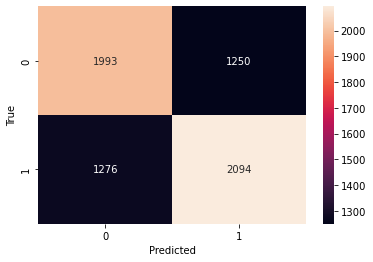

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [13]:
# Get probability estimates
probabilities = log_reg.predict_proba(X_val)

# Print the first 10 probability estimates
print(probabilities[:10])


[[0.64590958 0.35409042]
 [0.5703091  0.4296909 ]
 [0.73416526 0.26583474]
 [0.53296442 0.46703558]
 [0.4296514  0.5703486 ]
 [0.6220086  0.3779914 ]
 [0.70413884 0.29586116]
 [0.49741746 0.50258254]
 [0.60163069 0.39836931]
 [0.70774098 0.29225902]]


In [14]:
# Find misclassified examples
misclassified = y_val != y_val_pred
X_val_misclassified = X_val[misclassified]
y_val_misclassified = y_val[misclassified]

# Print some of the misclassified examples
print("Misclassified examples:")
print(X_val_misclassified[:10])


Misclassified examples:
       ImageLaterality  PatientAge  Manufacturer  ManufacturerModelName  \
20794         1.003029    0.550855     -0.260959              -0.162194   
2900         -0.996980   -0.273568     -0.260959               0.400808   
17878         1.003029    1.991803     -0.260959              -0.162194   
31112        -0.996980    0.844780     -0.260959               0.963809   
3102         -0.996980    2.328741     -0.260959              -0.162194   
3354         -0.996980    0.106384     -0.260959              -0.162194   
22575        -0.996980   -0.495804     -0.260959               0.400808   
17651        -0.996980    1.461305      6.290565              -3.352535   
15975        -0.996980   -0.624844     -0.260959               0.400808   
4217          1.003029    2.257052     -0.260959               0.400808   

       DistanceSourceToDetector  DistanceSourceToPatient  ExposureTime  \
20794                 -0.074602                 0.259023     -0.629614   
29

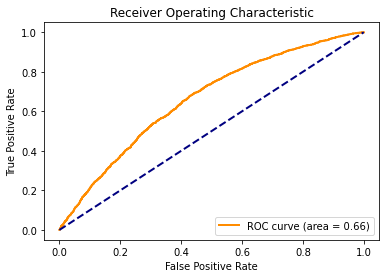

In [15]:
from sklearn.metrics import roc_curve, auc

y_prob = log_reg.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


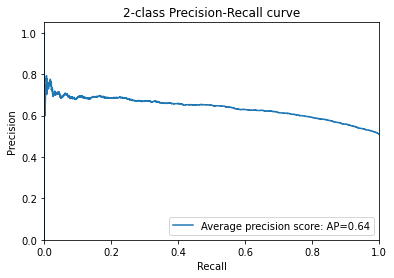

In [16]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_val, y_prob)

precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.step(recall, precision, where='post', label='Average precision score: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()


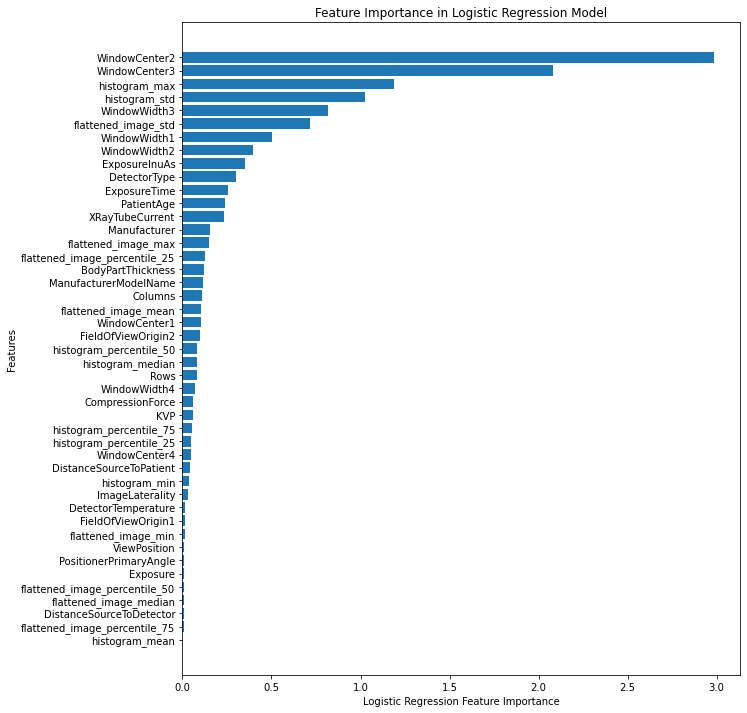

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming log_reg is your trained Logistic Regression model
feature_importance = abs(log_reg.coef_[0])
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 12))  # You can adjust the dimensions (width, height) as needed
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel('Logistic Regression Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()



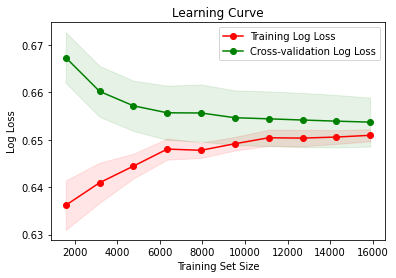

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Define the range of training sizes and the number of folds for cross-validation
train_sizes = np.linspace(0.1, 1.0, 10)
n_jobs = -1 # Use all available cores

train_sizes, train_scores, validation_scores = learning_curve(
    log_reg, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='neg_log_loss', n_jobs=n_jobs)

# Calculate mean and standard deviation for training set scores
train_mean = -np.mean(train_scores, axis=1)  # Note the negative sign
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation set scores
validation_mean = -np.mean(validation_scores, axis=1)  # Note the negative sign
validation_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std,
                 validation_mean + validation_std, color="g", alpha=0.1)

plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Log Loss")
plt.plot(train_sizes, validation_mean, 'o-', color="g", label="Cross-validation Log Loss")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")
plt.legend(loc="best")
plt.show()


In [20]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC

In [22]:

# Initialize alternative models
svm_model = SVC(kernel="linear", probability=True)
# neural_net = MLPClassifier()

# Fit alternative models
# Note: These models have their own hyperparameters that you can tune
svm_model.fit(X_train, y_train)
# neural_net.fit(X_train, y_train)

# Validate alternative models
# Evaluate their performance and compare with the logistic regression model


SVC(kernel='linear', probability=True)

In [23]:
# Validate the model
y_val_pred_svm = svm_model.predict(X_val)
print(classification_report(y_val, y_val_pred_svm))

              precision    recall  f1-score   support

           0       0.61      0.60      0.61      3243
           1       0.63      0.64      0.63      3370

    accuracy                           0.62      6613
   macro avg       0.62      0.62      0.62      6613
weighted avg       0.62      0.62      0.62      6613



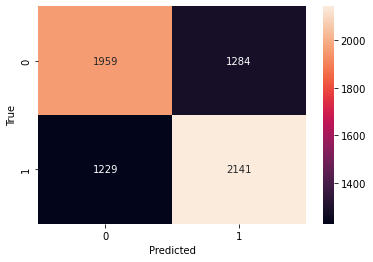

In [24]:
# Generate the confusion matrix
cm_svm = confusion_matrix(y_val, y_val_pred_svm)

# Plot the confusion matrix
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

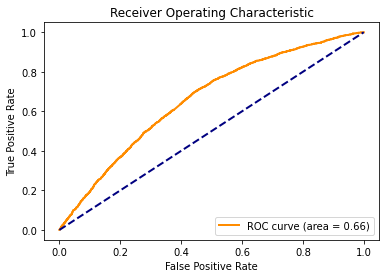

In [25]:
y_prob_svm = svm_model.predict_proba(X_val)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_val, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


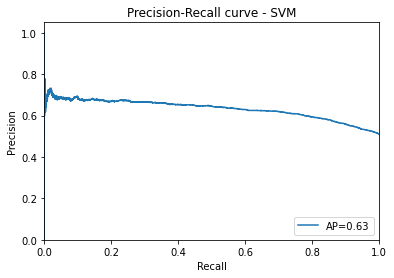

In [26]:
# Precision-Recall Curve
average_precision_svm = average_precision_score(y_val, y_prob_svm)
precision_svm, recall_svm, _ = precision_recall_curve(y_val, y_prob_svm)

plt.step(recall_svm, precision_svm, where='post', label='AP={0:0.2f}'.format(average_precision_svm))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve - SVM')
plt.legend(loc="lower right")
plt.show()

In [29]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Predict on the validation or test set
y_pred_log_reg = log_reg.predict(X_val)  # Assuming log_reg is your logistic regression model
y_pred_svm = svm_model.predict(X_val)    # svm_model is your trained SVC model

# Calculate the probabilities for ROC AUC score
y_proba_log_reg = log_reg.predict_proba(X_val)[:, 1]  # Logistic Regression probabilities
y_proba_svm = svm_model.predict_proba(X_val)[:, 1]    # SVC probabilities

# Classification reports
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred_log_reg))

print("\nSVC Classification Report:")
print(classification_report(y_val, y_pred_svm))

# ROC AUC scores
roc_auc_log_reg = roc_auc_score(y_val, y_proba_log_reg)
roc_auc_svm = roc_auc_score(y_val, y_proba_svm)

print(f"Logistic Regression ROC AUC Score: {roc_auc_log_reg}")
print(f"SVC ROC AUC Score: {roc_auc_svm}")

# Compare models
print("\nModel Comparison:")
print(f"{'Metric':<15} {'Logistic Regression':<20} {'SVC':<10}")
print(f"{'Accuracy':<15} {accuracy_score(y_val, y_pred_log_reg):<20} {accuracy_score(y_val, y_pred_svm):<10}")
print(f"{'Precision':<15} {precision_score(y_val, y_pred_log_reg):<20} {precision_score(y_val, y_pred_svm):<10}")
print(f"{'Recall':<15} {recall_score(y_val, y_pred_log_reg):<20} {recall_score(y_val, y_pred_svm):<10}")
print(f"{'F1 Score':<15} {f1_score(y_val, y_pred_log_reg):<20} {f1_score(y_val, y_pred_svm):<10}")
print(f"{'ROC AUC Score':<15} {roc_auc_log_reg:<20} {roc_auc_svm:<10}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      3243
           1       0.63      0.62      0.62      3370

    accuracy                           0.62      6613
   macro avg       0.62      0.62      0.62      6613
weighted avg       0.62      0.62      0.62      6613


SVC Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.60      0.61      3243
           1       0.63      0.64      0.63      3370

    accuracy                           0.62      6613
   macro avg       0.62      0.62      0.62      6613
weighted avg       0.62      0.62      0.62      6613

Logistic Regression ROC AUC Score: 0.6597302933229389
SVC ROC AUC Score: 0.6585730873435686

Model Comparison:
Metric          Logistic Regression  SVC       
Accuracy        0.618025102071677    0.6199909269620445
Precision       0.6261961722488039   0.6251094890510949
Reca

/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


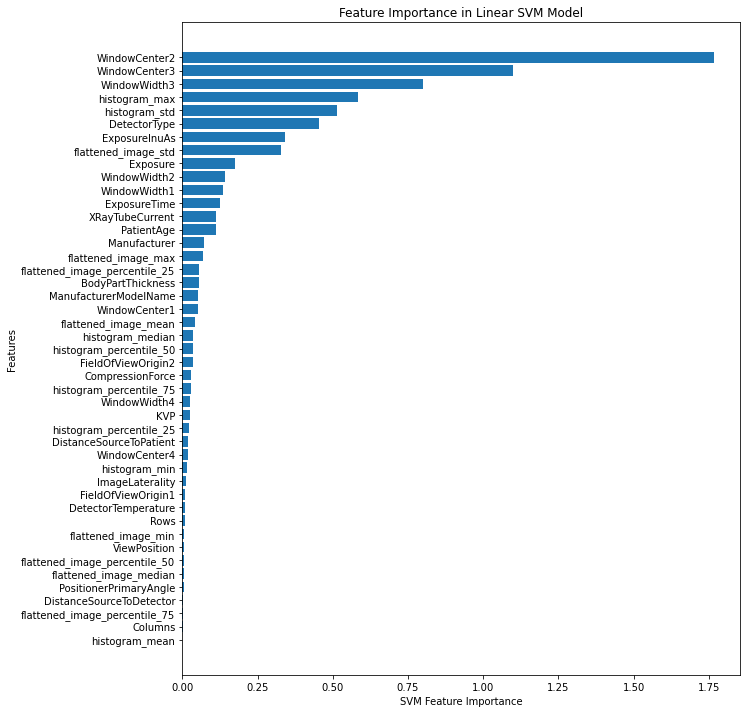

In [30]:
from sklearn.svm import LinearSVC

# Initialize the Linear SVM model
linear_svm = LinearSVC(max_iter=30000)

# Fit the model
linear_svm.fit(X_train, y_train)

# Get the feature importance
feature_importance_svm = abs(linear_svm.coef_[0])
sorted_idx_svm = np.argsort(feature_importance_svm)

# Visualize the feature importance
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx_svm)), feature_importance_svm[sorted_idx_svm], align='center')
plt.yticks(range(len(sorted_idx_svm)), [X_train.columns[i] for i in sorted_idx_svm])
plt.xlabel('SVM Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Linear SVM Model')
plt.show()


/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=3

/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=3

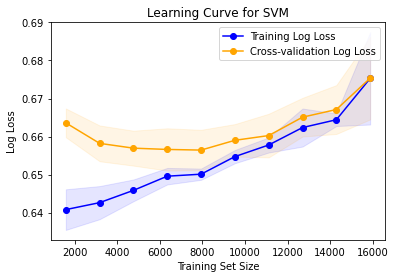

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

# Initialize the SVC model
svm_model = SVC(kernel='linear', probability=True, max_iter=30000)

# Define the range of training sizes and the number of folds for cross-validation
train_sizes = np.linspace(0.1, 1.0, 10)
n_jobs = -1  # Use all available cores

train_sizes, train_scores, validation_scores = learning_curve(
    svm_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='neg_log_loss', n_jobs=n_jobs)

# Calculate mean and standard deviation for training set scores
train_mean = -np.mean(train_scores, axis=1)  # Note the negative sign
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation set scores
validation_mean = -np.mean(validation_scores, axis=1)  # Note the negative sign
validation_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std,
                 validation_mean + validation_std, color="orange", alpha=0.1)

plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Log Loss")
plt.plot(train_sizes, validation_mean, 'o-', color="orange", label="Cross-validation Log Loss")

plt.title("Learning Curve for SVM")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")
plt.legend(loc="best")
plt.show()


In [31]:
# Initialize alternative models
neural_net = MLPClassifier(max_iter=5000)

# Fit alternative models
# Note: These models have their own hyperparameters that you can tune
neural_net.fit(X_train, y_train)


MLPClassifier(max_iter=5000)

In [33]:
from sklearn.metrics import classification_report

# Predict on the validation set
y_val_pred_nn = neural_net.predict(X_val)
print(classification_report(y_val, y_val_pred_nn))


              precision    recall  f1-score   support

           0       0.62      0.54      0.58      3243
           1       0.61      0.69      0.64      3370

    accuracy                           0.61      6613
   macro avg       0.62      0.61      0.61      6613
weighted avg       0.62      0.61      0.61      6613



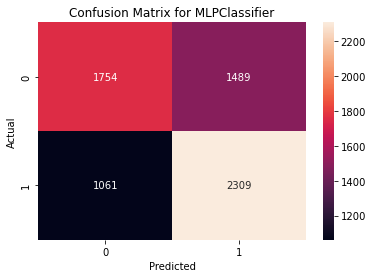

In [34]:
from sklearn.metrics import confusion_matrix

cm_nn = confusion_matrix(y_val, y_val_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLPClassifier')
plt.show()


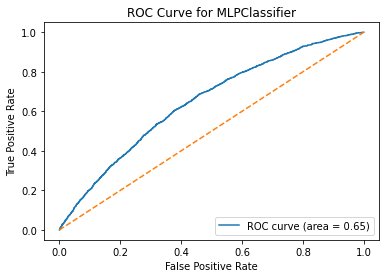

In [35]:
from sklearn.metrics import roc_curve, auc

# This assumes your neural_net model has a method `predict_proba`
y_probs_nn = neural_net.predict_proba(X_val)[:, 1]
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_val, y_probs_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.plot(fpr_nn, tpr_nn, label=f'ROC curve (area = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLPClassifier')
plt.legend(loc='lower right')
plt.show()


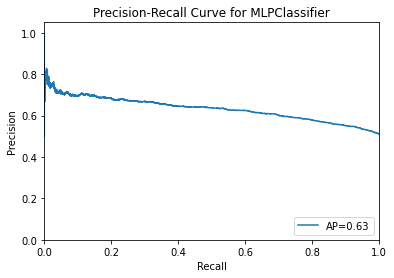

In [36]:
from sklearn.metrics import precision_recall_curve, average_precision_score

average_precision_nn = average_precision_score(y_val, y_probs_nn)
precision_nn, recall_nn, _ = precision_recall_curve(y_val, y_probs_nn)

plt.step(recall_nn, precision_nn, where='post', label=f'AP={average_precision_nn:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for MLPClassifier')
plt.legend(loc='lower right')
plt.show()


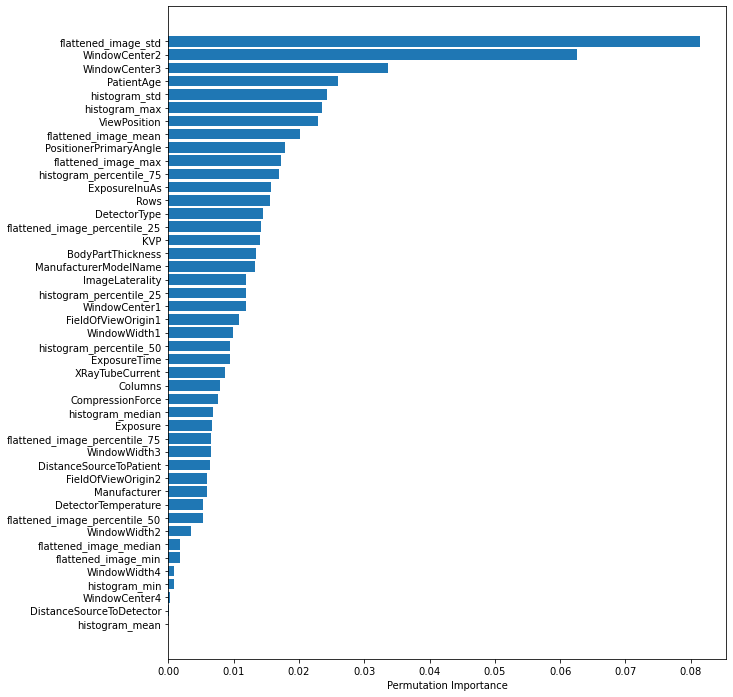

In [38]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(neural_net, X_val, y_val, n_repeats=10, random_state=0, n_jobs=-1)

sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10,12))

plt.barh(range(X_train.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.show()


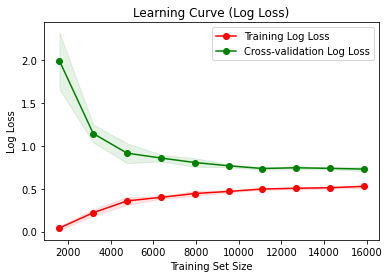

In [32]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, log_loss

# Assuming neural_net is your MLPClassifier model

# Create a scorer from the log_loss function
log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

train_sizes, train_scores, validation_scores = learning_curve(
    neural_net, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring=log_loss_scorer, n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = -np.mean(train_scores, axis=1)  # Note the negative sign
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation set scores
validation_mean = -np.mean(validation_scores, axis=1)  # Note the negative sign
validation_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color="g", alpha=0.1)

plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Log Loss")
plt.plot(train_sizes, validation_mean, 'o-', color="g", label="Cross-validation Log Loss")

plt.title("Learning Curve (Log Loss)")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")
plt.legend(loc="best")
plt.show()
